<a href="https://colab.research.google.com/github/atul2110/Sales-Analytics/blob/main/advertising_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing libraries
df=pd.read_csv('advertising.csv')

## Data preprocessing

In [ ]:
# check data
print(df.shape)
print(df.isnull().sum())

(200, 4)
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [ ]:
# Correlation matrix
print(df.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


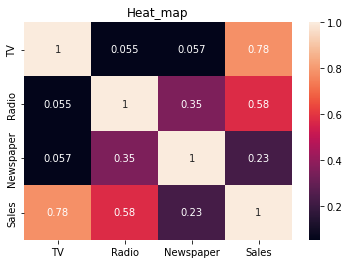

In [ ]:
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.title("Heat_map")
plt.show()

In [ ]:
# splitting data in training and testing set
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)

In [ ]:
print(x_train)

        TV  Radio  Newspaper
71   109.8   14.3       31.7
90   134.3    4.9        9.3
100  222.4    4.3       49.8
44    25.1   25.7       43.3
94   107.4   14.0       10.9
..     ...    ...        ...
58   210.8   49.6       37.7
21   237.4    5.1       23.5
49    66.9   11.7       36.8
64   131.1   42.8       28.9
68   237.4   27.5       11.0

[140 rows x 3 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [ ]:
print(x_train_scaler)

[[0.36895502 0.28830645 0.27616535]
 [0.45180927 0.09879032 0.07915567]
 [0.74974636 0.08669355 0.4353562 ]
 [0.08251606 0.51814516 0.37818821]
 [0.36083869 0.28225806 0.09322779]
 [0.83767332 0.60887097 0.1759015 ]
 [0.74332093 0.66935484 0.33069481]
 [0.70645925 0.41532258 0.09146878]
 [0.61515049 0.93145161 0.51363237]
 [0.73621914 0.55846774 0.46701847]
 [0.98816368 0.57056452 0.37730871]
 [0.26208996 0.94354839 0.30079156]
 [0.06391613 0.40524194 0.14687775]
 [0.4808928  0.59072581 0.10817942]
 [0.67331755 0.0625     0.30167106]
 [0.0557998  0.08266129 0.27528584]
 [0.55765979 0.2016129  0.15215479]
 [0.85593507 0.42943548 0.26121372]
 [0.78254988 0.1733871  0.07387863]
 [0.86134596 0.54233871 0.04573439]
 [0.25160636 0.70564516 0.46086192]
 [0.9773419  0.85282258 0.44766931]
 [0.62292864 0.4233871  0.19085312]
 [0.73080825 0.88508065 0.23658751]
 [0.2874535  0.72177419 0.43095866]
 [0.74974636 0.06854839 0.11257696]
 [0.30334799 0.00604839 0.20140721]
 [0.08826513 0.66532258 0.16

In [ ]:
print(x_test_scaler)

[[0.02231992 0.56653226 0.36147757]
 [0.25025364 0.99596774 0.39929639]
 [0.4687183  0.29233871 0.08707124]
 [0.38992222 0.15524194 0.2005277 ]
 [0.25600271 0.53830645 0.19349164]
 [0.96482922 0.28024194 0.02990325]
 [0.97024011 0.86693548 0.62884785]
 [0.2211701  0.11693548 0.21020229]
 [0.74264457 0.98790323 0.02550572]
 [0.80689888 0.3125     0.23746702]
 [0.23097734 0.1875     0.00527704]
 [0.94927291 0.7983871  0.48812665]
 [0.74095367 0.67540323 0.39401935]
 [0.12681772 0.07459677 0.11873351]
 [0.80960433 0.14717742 0.07387863]
 [0.14338857 0.53830645 0.3060686 ]
 [0.56712885 0.14314516 0.10993843]
 [0.14879946 0.52016129 0.17854002]
 [0.84612783 0.7358871  0.63324538]
 [0.23638823 0.32258065 0.35620053]
 [0.77578627 0.76209677 0.60598065]
 [0.0557998  0.92540323 0.60686016]
 [0.75515725 0.0483871  0.13456464]
 [0.52722354 0.05241935 0.0703606 ]
 [0.54988164 0.63709677 0.46262093]
 [0.06121069 0.4375     0.44063325]
 [0.69090294 0.90927419 0.16974494]
 [0.76868448 0.76008065 0.27

## Model Building

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.optimizers import SGD

In [ ]:
model_ann = Sequential()
model_ann.add(Dense(4,input_dim=3,activation='relu'))
model_ann.add(Dense(4,activation='relu'))
model_ann.add(Dense(1,activation='linear'))


In [ ]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ann.compile(loss='mse',optimizer='Adam')

In [ ]:
model_ann.fit(x_train_scaler,y_train,epochs=1000,validation_split=0.2)

Epoch 1/1000
4/4 [==============================] - 1s 52ms/step - loss: 233.3017 - val_loss: 215.4652
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 232.3932 - val_loss: 214.8391
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 231.7466 - val_loss: 214.2792
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 231.1067 - val_loss: 213.7499
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 230.5426 - val_loss: 213.2354
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 230.0391 - val_loss: 212.7512
Epoch 7/1000
4/4 [==============================] - 0s 11ms/step - loss: 229.6022 - val_loss: 212.2910
Epoch 8/1000
4/4 [==============================] - 0s 9ms/step - loss: 229.1926 - val_loss: 211.8773
Epoch 9/1000
4/4 [==============================] - 0s 9ms/step - loss: 228.8032 - val_loss: 211.4986
Epoch 10/1000
4/4 [==============================] - 0s 16ms/step - loss: 228.43

In [ ]:
predictions=model_ann.predict(x_test_scaler)

2/2 [==============================] - 0s 9ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,predictions)

0.9637677527149072

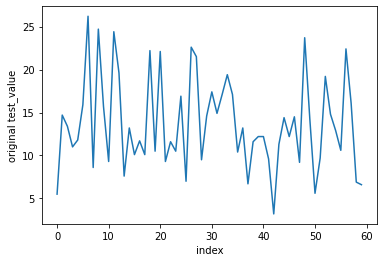

In [ ]:
index=[i for i in range(60)]
plt.plot(index,y_test)
plt.xlabel("index")
plt.ylabel("original test_value")
plt.show()

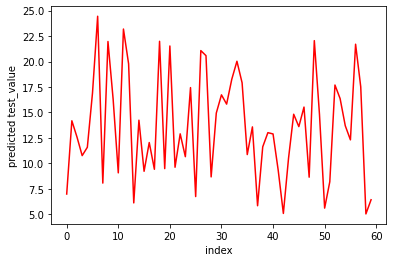

In [ ]:
index=[i for i in range(60)]
plt.plot(index,predictions,color='red')
plt.xlabel("index")
plt.ylabel("predicted test_value")
plt.show()

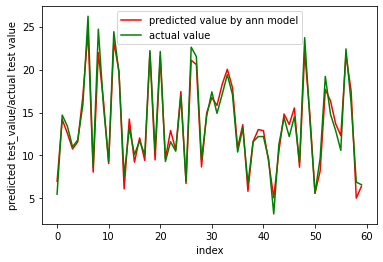

In [ ]:
index=[i for i in range(60)]
plt.plot(index,predictions,color='red',label='predicted value by ann model')
plt.plot(index,y_test,color='green',label='actual value')
plt.xlabel("index")
plt.ylabel("predicted test_value/actual test value")
plt.legend()
plt.show()